# Coursework 1 - Mathematics for Machine Learning

## 01703699

**Colab link:** [(https://colab.research.google.com/drive/1_9qR_pEiG28HpvQspX-xb7yxrQMiiQX0#scrollTo=ymUZlTbwIYCE)]

***
***

## Part 1: Quickfire questions [3 points]

### Question 1 (True risk / Empirical risk):
Let $D$ be the  $\textbf{(unknown)}$ distribution of our data with $N$ points of the form $(x_i,y_i)_{i=1,...,N}$.

Let $L$ be a chosen loss function.
The true risk is defined as $$R(f)=\mathbb{E}_D[L(f(x),y)].$$ True risk assumes that the model has an underlying distribution and is applied to the entire population.


The empirical risk is $$\hat{R}(f)=\frac{1}{N}\sum_{i=1}^NL(f(x^i),y^i).$$ It looks at the average loss over the finite sampled data points. Depending on the biases of the data, this model might not reflect the true performance on unseen examples.

The key information that binds them together is that the expectation of the empirical risk is equal to true risk (very useful since we can't say much about $D$) $$\mathbb{E}[\hat{R}(f)]=R(f).$$


### Question 2 ('Large' or 'rich' hypothesis class):
We have that  $$R(f)\leq \hat{R}(f)+\sqrt{\frac{\log|\mathcal{F}|+\log{\frac{2}{\delta}}}{2N}}$$ where $\mathcal{F}$ where $R$ is the true risk and $\hat{R}$ is the empirical risk. There is a trade-off between the data set $D^N$ and hypothesis class.
A larger hypothesis class $|\mathcal{F}|$ will increase the bound between the risks, but only logarithmically. 

There are cases where we would be interested in having a 'rich' hypothesis class, depending on the features we are looking for. This is decided in a case by case scenario.

An example of a not always useful hypothesis class could be $f:\Chi\rightarrow \{0,1\}$. The bound will then be defined only by the size of the dataset, however, one can see that a binary model has limited applicability.

Lastly, convergence in neural nets are based on the fact  that we have local convergence in the case when the data set is large enough. Normally convergence is guaranteed globally with smooth and convex functions, however, the further we go from that, the more we depend on the scale of data to make approximations. This is a case where we would deprioritize a large hypothesis class in the detriment of data.

### Question 3 (Dataset splitting):

It is fair to expect either a similar performance as the validation set. However, that may not always be attainable due to the size of data available.

What do we do when we get a different result? The first step is to check for model overfitting. Then consider whether your data sample is representative by looking at the variance on the cross-validation sets. Lastly, check whether the algorithm exhibits high stochasticity.

### Question 4 (Occam’s razor):

Occam's razor relates to model choice. It states that if we have to choose between multiple hypothesis that fit the data very well, we should go with the simplest one. 

### Question 5 (Generalisation error):

The generalisation error is defined as the difference between true risk and empirical risk $$= R(f)-\hat{R}(f)$$ which has a well known bound that depends on the hypothesis class and data size. We are in a case of bias-variance trade-off and want to optimize for minimal error. Let's get more empirical about it. Suppose we have a sequence of models that increase in complexity $\mathcal{F}_1\subset\mathcal{F}_2\subset....$. There is a point after which increasing the features will only lead to worse approximations, hence higher generalisation error. Define $f_*=\text{argmin}_{f\in\mathcal{F}_i}R(f_i^*)$.

We have that with probability at least $1-\delta$, $$R(f^*)\leq\text{min}_{f\in\mathcal{F}(f)}R(f)+2\sqrt{\frac{1}{2N}\log{ \frac {2|\mathcal{F}|} {\delta} }} $$ 
This says that when we are taking the function $f^*$ which minimizes the empirical risk, then the true risk of $f^*$ will not be too much worse than the true risk of the best function.

Next, if we set $n\geq \frac{1}{2\epsilon^2}\log{\frac{2|\mathcal{F}|}{\delta}}$ then $|R(f)-\hat{R}(f)|\leq\epsilon$. Esentially, we can take $\epsilon$ no matter how small, we can guarantee with a high probability that our bound is very small. The penalty lies in $n$.


For a good model we want this to be small because we are approximating the estimation error with the generalisation error $$R(f)-R(f^*)\leq 2 \text{sup}_{f\in\mathcal{F}}|R(f)-\hat{R}(f)|$$


### Question 6 (Rademacher complexity pt1):

The Rademacher complexity captures the richness of a family of functions by measuring the degree to which a hypothesis set can fit random noise. 

High Rademacher complexity indicates that the hypothesis set $\mathcal{G}$ is flexible and complex enough to accomodate random noise in the data. However, this flexibility can lead to overfitting, which in turn may lead to  poor generalization over unseen data.

We also want to avoid too much complexity, which can be mitigated by regularization.


This works using the following principle:
We have a $G$ family of functions that map from $Z$ to $[a,b]$

$S=(z_1,...z_m)$ a fixed sample of size $m$ of elements in $Z$.

Let $\sigma=(\sigma_1,...\sigma_m)^T$ with 
$\sigma_i$'s independent uniform random variables taking values in $\{-1,+1\}$.

Then $$\hat{\mathcal{R}_S}(G)=\mathbb{E}_{\sigma}\left[\text{sup}_{g\in G}\frac{1}{m}\sum_{i=1}^{m}\sigma_i g(z_i)\right]$$

Here $\sigma_ig_i(z_i)$ can be thought of as the correlations of the predictions with the labels.
Sample $\sigma_i$, $i=1,...m$. 

Look for the $g\in \mathcal{G}$ that best fits the randomly sample noise. This maximizes $\frac{1}{m}\sum_{i=1}^m\sigma_ig(z_i)$. A perfect fit would be very close to $1$ while a bad fit would be close to $0$.


### Question 7 (Rademacher complexity pt2):

Rademacher complexity is another method that can be used to bound the generalisation error to measure the richness of a function class. It captures the complexity of a function class in terms of its ability to fit random noise.

Let $G$ be a family of functions mapping $Z$ to $[0,1]$. Then, for any $\sigma>0$, with probability at $1-\sigma$. Both statements hold for all $g\in G$: 

$$E[g(z)]\leq\frac{1}{m}\sum_{i=1}^mg(z_i)+2\mathcal{R}_m(G)+\sqrt{\frac{\log{\frac{1}{\sigma}}}{2m}}$$

and

$$E[g(z)]\leq\frac{1}{m}\sum_{i=1}^mg(z_i)+2\hat{\mathcal{R}}_S(G)+3\sqrt{\frac{\log{\frac{2}{\sigma}}}{2m}}$$

### Question 8 (Regularisation term in the loss function):

$L1$ regularisation (Lasso), $L2$ regularisation (Ridge), dropout and adding noise during training are common regularisation methods.

In this example $$L(\theta)=\frac{1}{N}\sum_{i=1}^N||f_{\theta}(x_i)-y_i||_2^2 + \lambda \theta^T\theta$$ 
the term $\lambda \theta^T\theta$ is the regularisation term.

We do this in order to avoid overfitting, improve generalization (by discouraging complex models that only capture the most important patterns) and increase robustness (which ensures that noise and outliers do not give very different results).

### Question 9 (Momentum gradient descent):

Normal gradient descent has $$x_{k+1}=x_k-\alpha_k\nabla f(x_k).$$ 
Momentum gradient descent has $$x_{k+1}=x_k-\alpha z_{k+1}$$
$$z_{k+1}=\beta z_k+\nabla f(x_k)$$
This encapsulates the following properties: 
1. If the direction is fine, it increases stepsize
2. If it oscilates too much, it decreases stepsize

The problems it avoids are the following: 
1. It escapes from local minima and saddle points (by decreasing stepsize)
2. It smoothes out oscillations
3. It may achieve faster convergence (by increasing speed)

### Question 10 (Adam):

Adam is a type of stochastic optimisation that uses the second and first-order momentum to update gradient descent.

One of the key features of Adam is its adaptive learning rate mechanism. It computes individual learning rates for each parameter based on the magnitudes of past gradients and squared gradients.

In terms of momentum it operates similarly to momentum gradient descent: it maintains an exponentially decaying moving average of past gradients and their squared values. (taken from RMSprop)

### Question 11 (AdaGrad):

AdaGrad's name comes from ADAptive GRADient. It adapts the learning rate depending on the geometry of the problem: gives higher learning rates to infrequent features, prioritizing relevance over frequence. Its main drawback is that can sometimes slow down prematurely which in turn hijacks the speed of convergence.

Inputs $f(x), f_t(x), g_t(x)  (\text{ or } \nabla_x f_t(x)), x_t, G_t$

Update rule: $x_{t+1}=x_t +\eta\text{diag}(G_t)^{-1/2}g_t$

It could be thought of as a premature version of Adam.

### Question 12 (Decaying Learning Rate):

If the learning rate is too high and the objective function has a lot of curvature, then the gradient descent will oscillate lots. In sub-optimal cases it can miss the solution and get stuck (in a local minima or a saddle point) or not converge at all.

Decaying learning rate prevents that from happening. Additionally, it smoothens the trajectory in the loss landscape and the descent seems more controlled.

DLR assumes that at the begining of the learning the solution is far and so a high learning rate is beneficial. As the learning progresses the optimizers has to move more delicately to access more difficult areas in the landscape.

*** 
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


 1. Hoeffding's inequality: Let $X_1,X_2,...X_m$ be independent random variables with $X_i$ taking values in $[a_i,b_i]$ for all $i\in{1,2,...m}$. Then for any $\epsilon>0$, the following inequalities hold for $S_m=\sum_{i=1}^mX_i$: $$P[S_m-\mathbb{E}[S_m]\geq \epsilon]\leq \exp\left({\frac{-2\epsilon^2}{\sum_{i=1}^m (b_i-a_i)^2}}\right)$$ and  $$P[S_m-\mathbb{E}[S_m]\leq -\epsilon]\leq \exp\left({\frac{-2\epsilon^2}{\sum_{i=1}^m (b_i-a_i)^2}}\right)$$ Corollary $4.6$ says that: for $\epsilon>0$ and $D^N$ i.i.d. sample of size $N$. Then, for any hypothesis $f:X\rightarrow \{0,1\}$, the following inequalities hold: $$P_{D^N}[\hat{R}(f)-R(f)\geq \epsilon]\leq \exp\left({-2N\epsilon^2}\right)$$ $$P_{D^N}[\hat{R}(f)-R(f)\leq -\epsilon]\leq \exp\left({-2N\epsilon^2}\right)$$     How do we get from the first inequality to the second? 
    
    By setting the $X_i=\frac{1}{N}L(f(x_i),y_i)$ for $i=1,...,N$ (note that $N=m$) and then 
    
    $S_N=\frac{1}{N}\sum_{i=1}^NL(f(x_i),y_i)=\hat{R}(f)$ which is exactly the empirical risk. 

    Now, use that $\mathbb{E}[\hat{R}(f)]=R(f)$ so $\mathbb{E}[S_N]=R(f)$ which is exactly what we need.

    Now there is one more modification that we have to make to obtain $\exp\left({-2N\epsilon^2}\right)$ on the right-hand side of the inequality: We use the fact that the codomain of $X_i$ with $i=1,...,N$ is $\{0,\frac{1}{N}\}$ and not $\{0,1\}$.
    So $$\exp\left({\frac{-2\epsilon^2}{\sum_{i=1}^{N} (b_i-a_i)^2}}\right)=\exp\left({\frac{-2\epsilon^2}{\sum_{i=1}^N (0-\frac{1}{N})^2}}\right)=\exp\left({-2N\epsilon^2}\right)$$ Using these substitutions we obtain exactly the corollary we wanted to obtain.


2. A straight-forward if we combine both inequalities in the corollary we have that $$P_{D^N}[ | \hat{R}(f)-R(f) | \leq \epsilon]\leq 2\exp\left({-2N\epsilon^2}\right)$$ 


3. Theorem $4.8$ finds a bound between empirical risk and true risk: let $\mathcal{F}$ be a finite hypothesis set. Then, for any $\delta>0$, with probability at least $1-\delta$, the following inequality holds for any $f\in\mathcal{F}$, $$R(f)\leq \hat{R}(f)+\sqrt{\frac{\log|\mathcal{F}|+\log{\frac{2}{\delta}}}{2N}}    (\text{Theorem } 4.8)$$ where $\mathcal{F}$ is the class of hypothesis. $\mathcal{F}$ is the function class of outputs that we can extract from our imput data. The size of the  class is indicative on how many features we can extract from the data. This could be, for example, a binary classificaton model. Notice how our bound increases with exponential increase of function class. This means that we are contstraint between how detailed we want to be in our prediction versus how accurate we want to be. The size of the sample matters as well, as seen in the same formula. We are able to escape this by increasing the data sample, but that has to be done also exponentially, which might not be feasible.


***

### Question 2.2: On semi-definiteness [1 point]

Let $x\in \mathbb{R}^d$. Remember definition of convexity $$f(y)\geq f(x)+\nabla f(x)^T(y-x).$$ We want to show that $v^T\nabla^2f(x)v\geq 0$. We can use that in the one dimensional case $f''(x)\geq 0$.

Define $g(t)=f(x+tv)$ for an arbitrary direction $v\in \mathbb{R}^d$. We want to show that this is convex and twice differentiable and use that in our proof for $f$.

First, for convexity of $g$: 

Check that $g(\alpha a +(1-\alpha)b)\leq \alpha g(a)+(1-\alpha)g(b) \iff$
$$f\left(x+(\alpha a +(1-\alpha)b)v\right)\leq \alpha f(x+av)+(1-\alpha)f(x+bv) \iff $$

$f(\alpha (x+av)+(1-\alpha)(x+bv)) \leq \alpha f(x+av)+(1-\alpha)f(x+bv)$ which is true by the convexity of $f$.

Now we attempt to obtain the first differential for $g$.

$$\frac{g(t)-g(t_0)}{t-t_0}=\frac{f(x+tv)-f(x+t_0v)}{t-t_0}.$$

We use the first order inequality for convexity:
$$f(x+tv)-f(x+t_0v)\geq \nabla f(x+t_0v)^T(t-t_0)v $$
$$f(x+t_0v)-f(x+tv)\geq \nabla f(x+tv)^T(t_0-t)v $$

And obtain double inequality for $t > t_0$:
$$\nabla f(x+t_0v)^Tv  \leq \frac{g(t)-g(t_0)}{t-t_0}  \leq \nabla f(x+tv)^Tv$$ 
for all $t$ with $t_0<t$. 
Now take $t\rightarrow t_0$ (and similarly for $t<t_0$) and obtain proof of existance and explicit solution for $g'(t_0)$:
$$g'(t_0)=\nabla f(x+t_0v)^Tv$$

Now for the second differential:

$$\frac{g'(t)-g'(t_0)}{t-t_0}=\frac{(\nabla f(x+tv)^T-\nabla f(x+t_0v)^T)v}{t-t_0}$$

Obtain by direct calculation: 
$$g''(t)=(\nabla^2f(x+tv)v)^Tv$$

So $g''(0)=(\nabla^2f(x)v)^Tv$. We know that $g$ is convex and for one dimension convexity implies $g''(t)\geq 0$ for all $t$. So $g''(0)\geq 0$ and finally $$v^T \nabla^2f(x)^T v\geq 0$$ which is what we wanted.


***

### Question 2.3: A quick recap of momentum [1 point]

1. We aim to express the convergence rate to the local optimum. That means obtaining an expression that contains $x_k-x^*$, where $x^*=S^{-1}b$.

    The eigenvalues encapsulate the convergence speed and direction in multidimensional space.
    Decomposition $S=Q\text{diag} (\lambda_1,\lambda_2,...\lambda_d)Q^T$ obtained by performing a change of basis $w_k=Q^T(x_k-x^*)$ breaks down the problem into $d$ smaller independent linear problems. $w_T$ is what rotates and scales the system. Using this decomposition we can make statements about whether we converge towards a direction faster than others.


2. Equation $(75)$ states that $$x_k-x^*=Qw_k=\sum_{i=1}^nw_0^i(1-\alpha\lambda_i)^kq_i.$$
     The rate of convergence for a direction $q_i$ is $|1-\alpha\lambda_i|$. The closer this rate is to $1$, the slower the convergence. Moreover, if it surpasses $1$, then we cannot talk about a convergence behaviour at all.
     
      If the convergence rates are different then it is determined by the slowest component which can be either $\lambda_{\text{min}}$ or $\lambda_{\text{max}}$. There are multiple downsides that resign either in the assumption about the function $f$ or its behaviour towards the optimum. 

      Firstly, there is a trade-off between convergence rates in different directions depending on how we choose the stepsize $\alpha$. We cannot always guarantee equal convergence rates in all directions.
      
      Secondly, we made an assumption on $f$ being of the form $\frac{1}{2}x^TSx-b^Tx$. This can be impractical when it comes to more irregular and less smooth objects.
      
    




3. Equation $(85)$ states that    $$\begin{bmatrix}
        w_{k+1}^i \\
        y_{k+1}^i
    \end{bmatrix}=R^{k+1}\begin{bmatrix}
    w_0^i \\
    y_0^i
    \end{bmatrix}\text{ where } R=\begin{bmatrix}
        1-\alpha\lambda_i& -\alpha\beta\\
       \alpha_i & \beta
    \end{bmatrix}.$$
     $R$ is the update matrix that stores the coefficients for the recurrent system that contains the position and momentum $(y,w)$.
     
    $(y,w)$ is equivalent to $(x,z)$ after we performed the change of basis $w_k=Q^T(x_k-x^*)$ and $y_k=Q^Tz_k$ in the initial system $$ x_{k+1}=x_k-\alpha z_{k+1} \\ z_{k+1}=\beta z_{k}+(Sx_{k}-b).$$  
    
    $R$ captures information about the convergence and also stability for the system through its eigenvalues.
    For convergence we require its eigenvalues to have magnitude less than $1$. Otherwise, we might end up with divergent or oscillatory behaviour. How do we get this information empirically? By looking on whether $R^k$ goes to zero fast.
    


4. This step is about how the eigenvalues actually impact the speed in which $R^k$ goes to 0.
    In order to compute $R^k$ we have to diagonalize $R$ using $P$ ($P$ orthogonal). Then $$R=P\text{diag}(e_1,e_2)P^{-1}$$ where $e_1,e_2$ are the eigenvalues. We have that  $$\left|\left|\begin{bmatrix}
        w_{k+1}^i \\
        y_{k+1}^i
        \end{bmatrix}\right|\right|=\left|\left|R^{k+1}\begin{bmatrix}
        w_0^i \\
        y_0^i
        \end{bmatrix}\right|\right|\leq \text{max}(e_1,e_2)^{k+1}\left|\left|\begin{bmatrix}
        w_0^i \\
        y_0^i
        \end{bmatrix}\right|\right|$$
        This provides the reason to why we look at the eigenvalues.
        Now, in oder to compute them, calculate the roots of the characteristic polynomial given by $$\text{det}(eI-R)=0$$  This has the discriminant $$\Delta=(\beta+1-\alpha\lambda_i)^2-4\beta.$$
        We want it to be strictly negative so that the eigenvalues are complex conjugates of each other. This means that they are equal in amplitude (and less than $1$). 
        The convergence behvaiour in this case is favourable since it displays low frequency ripples and a  rate of $\sqrt{\beta}$ which is independent of the stepsize and eigenvalues $\lambda_i$.


***

### Question 2.4: Convergence proof [3 points]

1. Newton's gradient descent is a form of gradient descent $$x_{k+1}=x_k-\alpha\nabla f(x_k)$$ that has the stepsize $\alpha=(\nabla^2 f(x_k))^{-1}$ equal to the inverse of the Hessian: $$x_{k+1}=x_k-(\nabla^2 f(x_k))^{-1}\nabla f(x_k).$$ The key assumption that we make is that the Hessian has an inverse.



2. $f(x)=\frac{1}{2}x^TQx+b^Tx+c$ with $x\in\mathbb{R}^d$ and $Q≻0$. We aim to find  the critical point of $f(x)$ using Newton's method.
    Suppose we are at $x_0$.

    Calculate the gradient: $\nabla f(x_0)=Qx_0+b$

    Calculate the Hessian: $\nabla^2 f(x_0)=Q$

    Stepsize: $Q^{-1}$
    
    Newton's Method: $x_1=x_0-Q^{-1}(Qx_k+b)$ to obtain $$x_1=-Q^{-1}b$$ which is independent of the initial guess $x_0$. Check by pluging in that $x_2=x_1=-Q^{-1}b$ and so on.
    Thus Newton's method converges in a single step.
    


3. The result above states that under sufficient conditions Newton's method will converge in a single step. The conditions must satisfy smoothness of $f$ and existence of a global optimum and a ball in which the Hessian is invertible. This is important since it does not matter in which area of $B(x^*,\epsilon)$ we start.
    
     However, the conditions restrict $f$ severely. In practice we do not operate always with smooth functions. Another issue with the method is that computing the Hessian can be costly. Regardless, this result can be particularly advantageous in situations where computational resources are limited or when rapid convergence is essential.
     


4. Let's use the first iteration of Newton's method: $$x_1=x_0-(\nabla^2f(x_0))^{-1}\nabla f(x_0).$$ Next, apply Lemma $0.1$ for $$A=(\nabla^2 f(x_0))^{-1}\text{ and }x=\nabla^2 f(x_0)(x_0-x^*)-\nabla f(x_0)$$ then $$||Ax||\leq ||A||\cdot ||x||$$ becomes: $$||(x_0-x^*)-\nabla f(x_0)(x_0-x^*)||=||x_1-x^*||\leq ||\nabla^2f(x_0)^{-1}||\cdot||\nabla^2f(x_0)(x_0-x^*)-\nabla f(x_0)||$$ which is exactly what we wanted.



5. We want to use $4$
        Let's expand $\nabla f(x^*):$
        $$\nabla f(x^*)=\nabla f(x_0)+\nabla^2f(x_0)(x^*-x_0)+(x^*-x_0)^TL(\eta)(x^*-x_0)$$. Where $L(\eta)$ with $\eta\in B(x_0,\epsilon)$ We also know that $\nabla f(x^*)=0$
        Now plug that in the above inequality to obtain: 
        $$||x_1-x^*||\leq ||(\nabla^2f(x_0))^{-1}||\cdot ||(x^*-x_0)^TL(x^*-x_0)||=||(\nabla^2f(x_0)^{-1})||\cdot||L|| \cdot ||x^*-x_0||^2$$ which is exactly what we want for $c_1=||(\nabla^2f(x_0))^{-1}||$ and $c_2=||L(\eta)||$.
        


6. $x_0\in B(x^*,\epsilon)$ satisfies $$||x_0-x^*||\leq\frac{\alpha}{c_1c_2}$$ for some $0<\alpha<1$. From the previous exercise $$||x_1-x^* ||\leq c_1c_2||x_0-x^*||^2\leq c_1c_2\frac{\alpha^2}{(c_1c_2)^2}=\frac{\alpha^2}{c_1c_2}.$$
    But $\alpha \in (0,1)$ so $$\alpha^2\leq\alpha$$ which immediatly implies $$||x_1-x^*||\leq\frac{\alpha}{c_1c_2}$$



7. We have that for $||x_k-x^*||\leq \frac{\alpha}{c_1c_2}$. We know that $$||x_{k+1}-x^*||\leq c_1c_2||x_k-x^*||^2.$$ Then apply the same identity twice to get $$||x_{k+1}-x^*||\leq c_1c_2 ||x_k-x^*|| \cdot ||x_k-x^*||\leq c_1c_2 \frac{\alpha}{c_1c_2}\frac{\alpha}{c_1c_2}=\frac{\alpha^2}{c_1c_2}$$



8. We use the inequality $||x_{k+1}-x^*||\leq c_1c_2||x_k-x^*||^2$ and the initial condition $||x_0-x^*||\leq \frac{\alpha}{c_1 c_2}$. The latter is equivalent to $c_1c_2\leq \frac{\alpha}{||x_0-x^*||^2} $ (given that we did not start at $x^*$).

Then $||x_{k+1}-x^*||\leq c_1c_2||x_k-x^*||^2\leq \frac{\alpha}{||x_0-x^*||^2}||x_k-x^*||^2 =C||x_k-x^*||^2$ provided that we started in the vicinity of $x^*$. Then, the convergence is quadratic by definition.

***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [1]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

import pandas as pd
import seaborn as sns

import torch.utils.data as data



In [2]:
# Download datasets


train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)
                                        

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Set seed
SEED = 1703699
np.random.seed(SEED)
torch.manual_seed(SEED)

***

# Part 3.1: Implementations [1 point]

## Task 1: 
Implement a fully-connected neural network

In [151]:

"""
initialize fully connectedneural net neural network
"""
class Net(nn.Module):
    def __init__(self, dim, nclass, width, depth):
        #parent
        super().__init__()
        #flatten
        self.flatten = nn.Flatten()
        #first layer
        self.hidden_layers = nn.ModuleList([nn.Linear(dim, width)])
        #hidden layers
        self.hidden_layers.extend([nn.Linear(width, width) for _ in range(depth-1)])
        self.relu = nn.ReLU()
        #output layer
        self.output_layer = nn.Linear(width, nclass)
        
    def forward(self, input):
        #flatten
        x = self.flatten(input)

        #hidden layers
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.relu(x)

        #output layer
        output = self.output_layer(x)
        return output


Above we initialized a fully-connected neural network. The function __init__() initializes all layers and the function __forward__() establishes the relations between the layers.

## Task 2:
Implement the data loading function

In [152]:
from torch.utils.data import DataLoader

def loading_data(batch_size, train_set, test_set):
    """ data loading function 
    
        input: batch_size, train_set, test_set
        output: trainloader, testloader
    """
    trainloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
    return trainloader, testloader




__loading_data__() formats the data into appropriate network input. This helps with speed issues, as it is more costly to train a bigger input size than partitioning it into smaller batches.

## Task 3:
Implement a function that does one training epoch

In [153]:
def train_epoch(trainloader, net, optimizer, criterion):
    """ training function
    
        input: trainloader, net, optimizer, criterion
        output: running_loss / len(trainloader)
    """
    
    
    net.train()  # Set the model to training mode
    running_loss = 0
    
    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = net(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    return running_loss / len(trainloader)



## Task 4:  
Implement a function that does one test epoch


In [154]:
def test_epoch(testloader, net, criterion):
    """ testing function
    
        input: testloader, net, criterion
        output: average_loss, error
    """
    net.eval()  # Set the model to evaluation mode
    test_loss = 0
    total_samples = 0
    incorrect_samples = 0
    
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total_samples += labels.size(0)
            incorrect_samples += (predicted != labels).sum().item()
    
    average_loss = test_loss / len(testloader)
    error = incorrect_samples / total_samples
    
    return average_loss, error


## Task 5: 
Write a piece of code that sets the hyperparameters and that
allows to run the train and test epochs

In [155]:

def main(batch_size, train_set, test_set, dim, nclass, width, depth, learning_rate, num_epochs):

    """ main function
    
        input: batch_size, train_set, test_set, dim, nclass, width, depth, learning_rate, num_epochs
        output: store_trainl, store_testl, store_teste
    """
    
    # define network
    net = Net(dim, nclass, width, depth)
    # Define criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    # Load datasets
    trainloader, testloader = loading_data(batch_size, train_set, test_set)


    #Storing results
    store_trainl=[]
    store_testl=[]
    store_teste=[]
    # Train and test epochs
    for epoch in range(num_epochs):
       # Train epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)

        #store results
        store_trainl.append(train_loss)
        store_testl.append(test_loss)
        store_teste.append(test_err)
        # Print results
        print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.04} | Test Loss: {test_loss:.04} | Test Error: {test_err:.04}')
    return store_trainl, store_testl, store_teste


# Run the main function

main(batch_size=64, train_set=train_set_mnist, test_set=test_set_mnist, dim=28*28, nclass=10, width=100, depth=2, learning_rate=0.001, num_epochs=10)

Epoch: 000 | Train Loss: 0.3407 | Test Loss: 0.185 | Test Error: 0.0551
Epoch: 001 | Train Loss: 0.1435 | Test Loss: 0.1228 | Test Error: 0.0371
Epoch: 002 | Train Loss: 0.09779 | Test Loss: 0.1082 | Test Error: 0.0337
Epoch: 003 | Train Loss: 0.07397 | Test Loss: 0.09775 | Test Error: 0.0304
Epoch: 004 | Train Loss: 0.05824 | Test Loss: 0.08323 | Test Error: 0.0263
Epoch: 005 | Train Loss: 0.04742 | Test Loss: 0.08494 | Test Error: 0.0261
Epoch: 006 | Train Loss: 0.04025 | Test Loss: 0.07008 | Test Error: 0.0217
Epoch: 007 | Train Loss: 0.03291 | Test Loss: 0.1002 | Test Error: 0.0283
Epoch: 008 | Train Loss: 0.02715 | Test Loss: 0.08332 | Test Error: 0.0223
Epoch: 009 | Train Loss: 0.02463 | Test Loss: 0.08504 | Test Error: 0.0243


([0.3406838913783749,
  0.14347990829426088,
  0.09778658866630133,
  0.07397053086274326,
  0.058235347509505285,
  0.04741740390558594,
  0.04025286432419683,
  0.03291012354135297,
  0.02714960329892508,
  0.02463121291983233],
 [0.18498703626809038,
  0.12284765425909334,
  0.10824544142463073,
  0.09775091519402815,
  0.08323159335447315,
  0.08493866717636031,
  0.07008258643874136,
  0.10019506334156987,
  0.08332289147264343,
  0.08503911191272294],
 [0.0551,
  0.0371,
  0.0337,
  0.0304,
  0.0263,
  0.0261,
  0.0217,
  0.0283,
  0.0223,
  0.0243])

***

# Part 3.2: Numerical exploration [2 points]

Throughout this part we use MNIST dataset.

## Task 6: 
Analyse the performance for wide vs. deep neural networks

In [110]:
#hyperparameters
depths=[1,5,10]
width=256
learning_rate=0.001
batch_size=64
dim=28*28
nclass=10
num_epochs=10

#results
train_loss={}
test_loss={}
test_error={}

store_results={}
for depth in depths:
    print(f"Depth: {depth}")
    train_loss,test_loss,test_error=main(batch_size=batch_size, train_set=train_set_mnist, test_set=test_set_mnist, dim=dim, nclass=nclass, width=width, depth=depth, learning_rate=learning_rate, num_epochs=num_epochs)
    store_results[depth]={"train_loss":train_loss,"test_loss":test_loss,"test_error":test_error}

Depth: 1


Epoch: 000 | Train Loss: 0.3021 | Test Loss: 0.1543 | Test Error: 0.0463
Epoch: 001 | Train Loss: 0.1287 | Test Loss: 0.1087 | Test Error: 0.0336
Epoch: 002 | Train Loss: 0.08541 | Test Loss: 0.08572 | Test Error: 0.0253
Epoch: 003 | Train Loss: 0.06284 | Test Loss: 0.07676 | Test Error: 0.0239
Epoch: 004 | Train Loss: 0.04719 | Test Loss: 0.07927 | Test Error: 0.0252
Epoch: 005 | Train Loss: 0.03682 | Test Loss: 0.07214 | Test Error: 0.0217
Epoch: 006 | Train Loss: 0.02883 | Test Loss: 0.07534 | Test Error: 0.0226
Epoch: 007 | Train Loss: 0.02125 | Test Loss: 0.06709 | Test Error: 0.021
Epoch: 008 | Train Loss: 0.01705 | Test Loss: 0.07782 | Test Error: 0.0224
Epoch: 009 | Train Loss: 0.01374 | Test Loss: 0.07174 | Test Error: 0.0205
Depth: 5
Epoch: 000 | Train Loss: 0.311 | Test Loss: 0.1463 | Test Error: 0.0419
Epoch: 001 | Train Loss: 0.1164 | Test Loss: 0.1026 | Test Error: 0.0282
Epoch: 002 | Train Loss: 0.0858 | Test Loss: 0.1176 | Test Error: 0.0327
Epoch: 003 | Train Loss: 0.0

In [108]:

# Define the data
data = {
    'Depth': [1, 5, 10],
    'Train Loss': [store_results[1]['train_loss'][-1], store_results[5]['train_loss'][-1], store_results[10]['train_loss'][-1]],
    'Test Loss': [store_results[1]['test_loss'][-1], store_results[5]['test_loss'][-1], store_results[10]['test_loss'][-1]]
}

# Create the pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Depth  Train Loss  Test Loss
0      1    0.014338   0.075299
1      5    0.027446   0.162746
2     10    0.061735   0.109880


We notice that the test loss for higher depth numbers is worse, but the training loss is lower. This means that the network is indeed learning, altought not the most signifficant features.

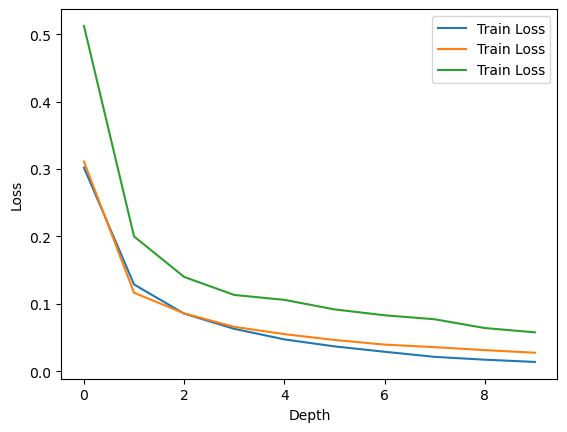

In [169]:


# Extract the train and test loss values for each depth level
train_loss = [[store_results[depth]['train_loss'][epoch]for depth in depths] for epoch in range(num_epochs)]


# Plot the train and test loss against depth levels
plt.plot(range(num_epochs), train_loss, label='Train Loss')


# Add labels and legend
plt.xlabel('Depth')
plt.ylabel('Loss')
plt.legend()


# Show the plot
plt.show()

From this plot we can see that the network is definitely learning as the number of layers increases. Now we can also check performance on the test data.

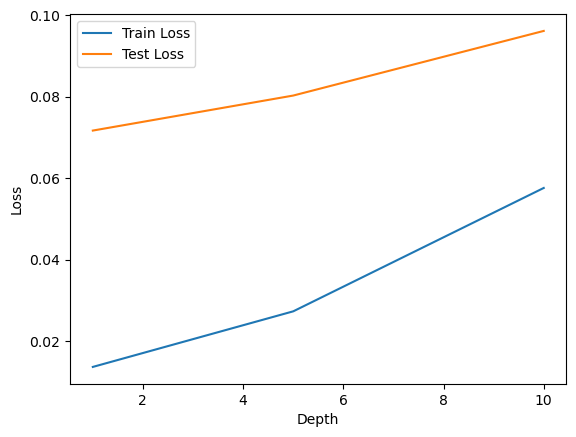

In [111]:


# Extract the train and test loss values for each depth level
train_loss = [store_results[depth]['train_loss'][-1] for depth in depths]
test_loss = [store_results[depth]['test_loss'][-1] for depth in depths]

# Plot the train and test loss against depth levels
plt.plot(depths, train_loss, label='Train Loss')
plt.plot(depths, test_loss, label='Test Loss')

# Add labels and legend
plt.xlabel('Depth')
plt.ylabel('Loss')
plt.legend()


# Show the plot
plt.show()





## Discussion: 
We observe a decrease in performance as the numbers of layers increases. This is most likely due to overfitting. Adding more layers means adding more complexity to the model and it is very likely that the network is training itself from features that are no longer representative to the real distribution. Thus adding more layers in a uniform matter does not guarantee convergence to a representative model.

If one does wish to keep an increased number of layers but avoid overfitting, one might possibly mitigate that by decreasing the width as the layer number increases. In this run we used __width__ $=256$. We know, however, that the MNIST data set contains $10$ classes. It would make sense to have an output layer of width $10$ and perhaps a penultimate layer with the order of around $50$ to assure that only the most relevant features are contributing to the decision.

## Task 7:
Analyse the train and test errors as a function of width

In [175]:
depth=1
widths=[4,8,16,32,64,128,256,128,512,1024]
learning_rate=0.001
batch_size=64
dim=28*28
nclass=10
num_epochs=10

#results
store_results={}
train_loss=[]
test_loss=[]
test_error=[]
for width in widths:
    print(f"Width: {")width}
    train_loss,test_loss,test_error=main(batch_size=batch_size, train_set=train_set_mnist, test_set=test_set_mnist, dim=dim, nclass=nclass, width=width, depth=depth, learning_rate=learning_rate, num_epochs=num_epochs)
    store_results[width]={"train_loss":train_loss,"test_loss":test_loss,"test_error":test_error}

Width: 4


Epoch: 000 | Train Loss: 1.114 | Test Loss: 0.6704 | Test Error: 0.2206
Epoch: 001 | Train Loss: 0.5851 | Test Loss: 0.5114 | Test Error: 0.1536
Epoch: 002 | Train Loss: 0.5106 | Test Loss: 0.4831 | Test Error: 0.1444
Epoch: 003 | Train Loss: 0.4879 | Test Loss: 0.4713 | Test Error: 0.1383
Epoch: 004 | Train Loss: 0.474 | Test Loss: 0.4657 | Test Error: 0.1349
Epoch: 005 | Train Loss: 0.4647 | Test Loss: 0.4557 | Test Error: 0.1324
Epoch: 006 | Train Loss: 0.4575 | Test Loss: 0.4496 | Test Error: 0.1305
Epoch: 007 | Train Loss: 0.4508 | Test Loss: 0.4485 | Test Error: 0.1305
Epoch: 008 | Train Loss: 0.446 | Test Loss: 0.4413 | Test Error: 0.1278
Epoch: 009 | Train Loss: 0.4425 | Test Loss: 0.4412 | Test Error: 0.1296
Width: 8
Epoch: 000 | Train Loss: 0.7232 | Test Loss: 0.3683 | Test Error: 0.1039
Epoch: 001 | Train Loss: 0.3474 | Test Loss: 0.3163 | Test Error: 0.0873
Epoch: 002 | Train Loss: 0.3121 | Test Loss: 0.3005 | Test Error: 0.0847
Epoch: 003 | Train Loss: 0.2972 | Test Loss: 

In [28]:

# Define the data
data = {
    'Width': [4, 8, 16, 32, 64, 128, 256, 512, 1024],
    'Train Loss': [store_results[4]['train_loss'][-1], store_results[8]['train_loss'][-1], store_results[16]['train_loss'][-1], store_results[32]['train_loss'][-1], store_results[64]['train_loss'][-1], store_results[128]['train_loss'][-1], store_results[256]['train_loss'][-1], store_results[512]['train_loss'][-1], store_results[1024]['train_loss'][-1]],
    'Test Loss': [store_results[4]['test_loss'][-1], store_results[8]['test_loss'][-1], store_results[16]['test_loss'][-1], store_results[32]['test_loss'][-1], store_results[64]['test_loss'][-1], store_results[128]['test_loss'][-1], store_results[256]['test_loss'][-1], store_results[512]['test_loss'][-1], store_results[1024]['test_loss'][-1]]
}

# Create the pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Width  Train Loss  Test Loss
0      4    1.084967   1.076516
1      8    0.381011   0.376134
2     16    0.287506   0.289064
3     32    0.141800   0.160648
4     64    0.102708   0.113400
5    128    0.055171   0.102568
6    256    0.045430   0.106887
7    512    0.038511   0.089831
8   1024    0.039660   0.102426


Again we notice that the  network is indeed learning on the training data and we see a promising improvement in the first $5$ iterations as well. The loss stagnates after that. This means that the error will likely be lower, but the 'quantity' of 'wrongness' stays the same.

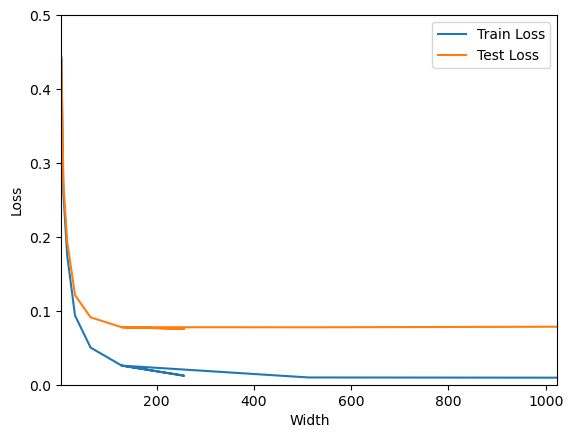

In [176]:

# Extract the train and test loss values for each width level
train_loss = [store_results[width]['train_loss'][-1] for width in widths]
test_loss = [store_results[width]['test_loss'][-1] for width in widths]

# Plot the train and test loss against width levels
plt.plot(widths, train_loss, label='Train Loss')
plt.plot(widths, test_loss, label='Test Loss')

# Add labels and legend
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend()

# Set the desired range for the x-axis and y-axis
plt.xlim(4, 1024)
plt.ylim(0, 0.5)

# Show the plot
plt.show()





Plot consistent with what we described from the table, however we see a steep decrease at the begining which makes us consider possible convergence behaviour.

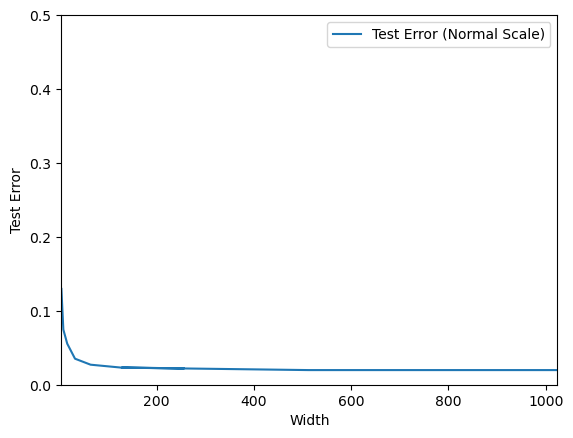

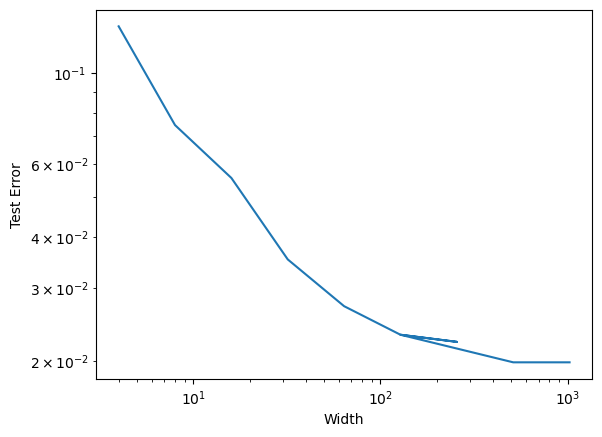

convergence rate: -0.33518115304922574


In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the test error values for each width level
test_error = [store_results[width]['test_error'][-1] for width in widths]

# Plot the test error against widths in normal scale
plt.plot(widths, test_error, label='Test Error (Normal Scale)')

# Add labels and legend
plt.xlabel('Width')
plt.ylabel('Test Error')
plt.legend()
# Set the desired range for the x-axis and y-axis in normal scale
plt.xlim(4, 1024)
plt.ylim(0, 0.5)
plt.show()

# Plot the test error against widths in log-log scale

# Fit a line to the data
coefficients = np.polyfit(np.log(widths), np.log(test_error), 1)

# Show the coefficient
coefficient = coefficients[0]
plt.loglog(widths, test_error, label='Test Error (Log-Log Scale)')

# Add labels and legend
plt.xlabel('Width')
plt.ylabel('Test Error')




# Show the plot
plt.show()
print(f"convergence rate: {coefficient}")



Fortunately, this is the case. The loss function stays the same and the test error decreases dramatically as the number of layers increases. We check the rate of convergence and obtain $-0.35$.

## Discussion:

In this part of the exercise we analysed the dependence of training on width parameter. We expected imporvement in accordance with [Neyshabur et al., 2018] experiments part, but we used AdamGrad instead of SGD.


This could potentially explain the discrepancy in convergence rate. The paper prooves a rate of $\mathcal{O}(\sqrt{w})$, so $-0.5$. We got $-0.35$.


***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

Consider a fully connected neural network. 

Suppose the input $x$ is of dimensionality $N_0$. 
$N_1$ hidden nodes in layer $1$ and $N_2$ output nodes. 

The activation function is given by $$f_i^{(1)}(x)=\sum_{j=1}^{N_0}w_{ij}^{(1)}x_j+b_i^{(1)}.$$ 

$w_{ij}^{(1)}$ is the weight of the first layer connecting node $i$ in layer $1$ with input $j$ 

$b_i^{(1)}$ is the bias we add in layer $1$ to output node $i$.

The non-linear function $$g_i^{(1)}(x)=\phi(f_i^{(1)}(x))$$

The output layer is given by $$f_i^{(2)}=\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)+b_i^{(2)}$$

Distribution on the parameters of the network.
Distribution on the other nodes conditional on the inputs.

$w_{ij}^{(l)} ∼ \mathcal{N}(0,C_w^{(l)})$ i.i.d.

$b_i^{(l)}∼\mathcal{N}(0,\sigma_b^{(l)})$ i.i.d.

Where $l\in\{0,1\}$ is the number of layer, $C_w^{(l)}$ weight variance and $\sigma_b^{(l)}$ variance for biases. We know that for $j\neq j'$ we have that $f_j^{(1)}$ and $f_{j'}^{(1)}$ are independent.

We use the results from the paper [Neal,1996]

## Task 1: Proper weight scaling

We are interested in the behaviour of the network as the width $N_1$ goes to infinity.

We look at the initial relation $f_i^{(2)}(x)=\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)+b_j^{(2)}$.

For $f_i^{(2)}(x)$ the variance is $=\sigma_b^{(2)}+N_1C_w^{(2)} E[g_j(x^{(1)})^2]$ (by using independence). Where $E[g_j(x^{(1)})^2]$ is the same for all $j$.

To obtain a well defined (finite) limit for the prior distribution of the value of the function at any point, we scale the prior variance according to the number of hidden units: $C_w^{(2)}=\frac{\sigma_w^{(2)}}{N_{1}}$. Otherwise, the value would blow up to infinity.

This makes sense for $l>2$ as well. The scaling is a necessary condition for convergence.




## Task 2: Derive the GP relation for a single hidden layer

We want to show that $f_i^{(2)}(x)=\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)+b_j^{(2)}$ converges to a Gaussian process. 

We already know that $w_{ij}^{(l)}$ and $b_{i}^{(l)}$ are i.i.d. and for $i\neq j$ then $g_i^{(l)}$ and $g_j^{(l)}$ are i.i.d.

Under the prior, each term of the sum is independednt and Gaussian.   Because of independence, we are able to apply CLT to obtain a multivariate Gaussian. The posterior of a Gaussian is also a Gaussian, so we get the from that we wanted for $f_i^{(2)}∼GP(\mu_1,K^1)$. To obtain the variance of $f_i^{(2)}$ we have to integrate over the prior, so over $w_{ij}^{(1)}$ and $b_{i}^{(1)}$.

Because the parameters have mean equal to $0$, then $$\mathbb{E}\left[f_i^{(2)}(x)\right]=\sum_{j=1}^{N_1}\mathbb{E}\left[w_{ij}^{(2)}g_j^{(1)}(x)+b_j^{(2)}\right]=\sum_{j=1}^{N_1}\mathbb{E}\left[w_{ij}^{(2)}\right]\mathbb{E}\left[g_j^{(1)}(x)\right]+\mathbb{E}\left[b_j^{(2)}\right]=0.$$  (Since $\mathbb{E}\left[w_{ij}^{(2)}\right]$ and $\mathbb{E}\left[b_j^{(2)}\right]=0$).

So $f_i^{(2)}$ has the variance $$\mathbb{E}\left[f_i(x^{(2)})f_i(x^{(2)})\right]=\sigma_b^{(2)}+\sum_{j}C_w^{(2)}\mathbb{E}\left[g_j(x^{(1)}),g_j(x^{(1)})\right]=\sigma_b^{(2)}+\sigma_w^{(2)}\mathbb{E}\left[g_j^{(1)}(x^{(1)}),g_j^{(1)}(x^{(1)})\right]$$ because $\mathbb{E}\left[g_j(x^{(1)}), g_j(x^{(1)})\right]$ has the same value for all $j$.

And the covariance function $$K^2(x,x')=\mathbb{E}\left[f_i(x^{(2)})f_i(x'^{(2)})\right]=\sigma^{(2)}_b+\sigma_w^{(2)} F_{\phi}\left(K^1(x,x'),K^1(x,x),K^1(x',x')\right)$$

and $$K^1(x,x')=\sigma_b^{(1)}+\sigma_w^{(1)}\left(\frac{x\cdot x'}{N_0}\right)$$


## Task 3: Why in succession

We answer this question using [Lee et al.,2017].
We take the limits in succession to guarantee that the input to the layer under consideration is already governed by a GP.

## Task 4: Derive the GP relation for multiple hidden layers

We do this inductively. Suppose that $f_i^{(l)}(x)=\sum_{j=1}^{N_l}w_{ij}^{(l)}g_j^{(l-1)}(x)+b_j^{(l)}$ is a Gaussian Process identical nd independent for every $i$, with mean zero and variance $K^{l-1}$.

Just like before, $f_i^{(l)}(x)$ is a sum of i.i.d. random terms. $\{f_i^{(l)}(x^{\alpha=1}),f_i^{(l)}(x^{\alpha=2}),...,f_i^{(l)}(x^{\alpha=k})\}$ has a joint multivariate Gaussian distribution with $f_i^l∼GP(0,K^l)$ as $N_l$ goes to infinity.

The covariance matrix is just like before $$K^l(x,x')=\sigma_b^{(l)}+\sigma_w^{(l)}\mathbb{E}\left[g_j^{(l-1)}(x),g_j^{(l-1)}(x')\right]=\sigma_b^{(l)}+\sigma_w^{(l)}\mathbb{E}\left[\phi(f_j^{(l-1)}(x)),\phi(f_j^{(l-1)}(x'))\right]$$

Finally, to highlight the relation between $K^l$ and $K^{l-1}$:

$$K^l(x,x')=\sigma_b^{(l)}+\sigma_w^{(l)}F_{\phi}\left(K^{l-1}(x,x'),K^{l-1}(x,x),K^{l-1}(x',x')\right)$$ 
where $F$ depends on $\phi$.

***

## Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

## Task 0:

To perform classification using the Gaussian process, we can use the decision rule based on the predicted mean and variance of the Gaussian process. The decision rule can be formulated as follows:

For a given test input, compute the predicted mean and variance of the Gaussian process after pre processing through the neural network.
If the predicted mean is greater than a threshold, classify the input as the positive class.
If the predicted mean is less than the negative of the threshold, classify the input as the negative class.
If the predicted mean is within the range of -threshold to threshold, the classification can be considered uncertain or ambiguous.

Below we initialise the data. We selected only $500$ samples from each class, labeled them with either $-0.5$ or $0.5$. This is called one-hot encoding, and it is mainly used when dealing with categorical data.



In [4]:
# Load CIFAR-10 dataset
transform = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define the class indices for cat and truck
cat_index = 3
truck_index = 9

# Select only the samples corresponding to cat and truck classes
cat_indices = np.where(np.array(train_dataset.targets) == cat_index)[0]
truck_indices = np.where(np.array(train_dataset.targets) == truck_index)[0]

# Subsample 1000 training samples from each class   
selected_cat_indices = np.random.choice(cat_indices, size=500, replace=False)
selected_truck_indices = np.random.choice(truck_indices, size=500, replace=False)

# Combine the selected indices
selected_indices = np.concatenate([selected_cat_indices, selected_truck_indices])

# Store the selected samples and targets
trainset_data = train_dataset.data[selected_indices]
trainset_targets = np.array(train_dataset.targets, dtype="float64")[selected_indices]


trainset_targets[trainset_targets == cat_index] = -0.5
trainset_targets[trainset_targets == truck_index] = 0.5


#print (train_dataset.shape)

stored=trainset_data
# Flatten trainset.data
trainset_data = np.reshape(trainset_data, (trainset_data.shape[0], -1))/255



Files already downloaded and verified


## Task 1:

Below we defined the kernel function in vectorised form. Using vectorised form is extremely beneficial in terms of computation time. This is because vector multiplications are done in C (which is as a rule of thumb $100$ times faster than python). However, sometimes it is difficult to see the vectorisation formulas as easily.

In [5]:
def kernel_NONVECT( L, sigma_w, sigma_b, X1, X2):
    """ THIS IS THE OLD VERSION OF KERNEL FUNCTION, NOT VECTORIZED. SEE THE NEXT CELL FOR THE VECTORIZED VERSION
    """
   #get the dimensions of the data as described in the notes
    M1, N0 = X1.shape
    M2, N0 = X2.shape

    #initialize K
    K = torch.zeros(M1+M2, M2+M1)
    #concatenate the data
    X=torch.cat((torch.from_numpy(X1),torch.from_numpy(X2)))
    


    #initialize K for the first layer
    K = sigma_b[0] + sigma_w[0]  * (X @ X.T) / N0

    for layer in range(1, L):
        
        #use the previous version of K
        K_old =K.clone().detach()
        for i in range(M1+M2):
            for j in range(i+1):
                #calculate common term
                common_term = K_old[i, j] / (torch.sqrt(K_old[i,i] * K_old[j,j]))
                theta = torch.acos(torch.clamp(common_term, -1, 1))
                #calculate sin and cos terms
                sin_term = torch.sin(theta)
                cos_term = (torch.pi - theta) * common_term
                #print('common_term',common_term,'sin_term',sin_term,'cos_term',cos_term)

                #calculate K[i,j]
                K[i, j] = sigma_b[layer] + (sigma_w[layer] / (2*torch.pi)) * torch.sqrt(K_old[i,i] * K_old[j,j]) * (sin_term + cos_term)
                K[j,i]=K[i,j]
    return K[0:M1, 0:M1],K[M1:M1+M2, M1:M1+M2], K[M1:M1+M2, 0:M1]

                

    

In [6]:
def kernel( L, sigma_w, sigma_b, X1, X2):
    """ kernel function 
            
        input: L, sigma_w, sigma_b, X1, X2
        output: K[0:M1, 0:M1], K[M1:M1+M2, M1:M1+M2], K[M1:M1+M2, 0:M1]
        
        The output is a tuple of three matrices: K_star_star, K, K_star or as described in the notes K^l(X^*,X^*), K^l(X,X), K^l(X^*,X)

        We chose to do compute a bigger matrix that has K and K_star_star on the block diagonals and K_star on the off-diagonal blocks
        rather than computing them using 3 different loops.
        """
    
    #get the dimensions of the data as described in the notes
    M1, N0 = X1.shape
    M2, N0 = X2.shape

    #initialize K
    K = torch.zeros(M1+M2, M2+M1)
    #concatenate the data
    X=torch.cat((torch.from_numpy(X1),torch.from_numpy(X2)))

    #compute K for layer 1
    K = sigma_b[0] + sigma_w[0]  * (X @ X.T) / N0

    for layer in range(1, L):
        #make a matrix with the diagonal elements of K
        broad = K.diag().unsqueeze(1).expand(M1+M2, M1+M2)

        #normalizing term
        ctb = torch.sqrt(broad * broad.T)

        #common term
        ct = K / ctb

        #angle term
        theta = torch.acos(torch.clamp(ct, -1, 1))

        #sine term
        sin_term = torch.sin(theta)

        #cosine term
        cos_term = (torch.pi - theta) * ct
        
        #recurrence relation
        K = sigma_b[layer] + (sigma_w[layer] / (2*torch.pi)) * ctb * (sin_term + cos_term)

    return K[0:M1, 0:M1],K[M1:M1+M2, M1:M1+M2], K[M1:M1+M2, 0:M1]

## Task 2:
Implemented a prediction function that also returns classification.

In [7]:


def prediction( L, sigma_w, sigma_b, X_train, X_test,y_train, noise):
    """"
    input: L, sigma_w, sigma_b, X_train, X_test,y_train, noise
    output: mean, var,classif
    
    The output is a tuple of three matrices: mean, var,classif
    """
    #get the dimensions of the data as described in the notes
    K,K_star_star,K_star= kernel(L, sigma_w, sigma_b, X_train, X_test)
   
    #invert K
    K_inv = invert(K+noise*torch.eye(K.shape[0]))
    
   
   
    
    #calculate mean
    mean = K_star @ K_inv @ y_train

    #calculate variance
    var = K_star_star - K_star @ K_inv @ K_star.T
   
  
    
 

    #classification
    threshold=0
    classif = torch.where(mean > threshold, torch.tensor(0.5), torch.tensor(-0.5))
    

    return mean, var,classif


def invert(K):
    """"This function inverts a matrix using the Cholesky decomposition method"""
    # Compute the Cholesky decomposition of K
    L = torch.linalg.cholesky(K)
    
    # Create an identity matrix of the same size as K
    identity_matrix = torch.eye(K.size(0), device=K.device, dtype=torch.float64)
    
    # Solve the system of linear equations to find the inverse
    K_inv = torch.cholesky_solve(identity_matrix, L)
    
    return K_inv




## Task 3:
Analyse performance:

Our hyperparameters are $\sigma_w$ (array of size $L$) $\sigma_b$ (array of size $L$) and $\sigma_{\text{noise}}$ (same for all layers).
We use the method that is described in [Pang et al., NNGP PDE] [DOI: 10.13140/RG.2.2.35191.11681](https://doi.org/10.13140/RG.2.2.35191.11681) to optimize the hyperparameters using __scipy.optimize.minimize__. 

Our loss function is $$\frac{1}{2}o^T{K^{-1}_{oo}(\theta, \sigma^2_{\text{noise}})}o + \frac{1}{2} \log |K_{oo}(\theta, \sigma^2_{\text{noise}})| + \frac{N_o}{2} \log 2\pi$$
where $o$ represents the training (observed) data labels $K_{oo}$ is $K(X,X)$.

We also use the same sampler that was used in the paper. This is because we risk getting stuck in local minima, so attempting optimisation over multiple random starting points might give us better expration.

In [31]:
from scipy.optimize import minimize
from scipy.stats import qmc
from sklearn.model_selection import train_test_split
L = 10

#sampler = qmc.Halton(d=1, scramble=False)
sampler = qmc.Halton(d=1, scramble=False)
sampler.fast_forward(100)

# Define the negative log marginal likelihood function
def nlml(theta, L,X_train, X_test,y_train,N0):
    """
    input: theta, L,X_train, X_test,y_train,N0
    output: Loss function"""
    #extract the hyperparameters from the big vector theta
    sigma_w=theta[0:L]
    sigma_b=theta[L:2*L]
    noise=theta[2*L]

    #compute the kernel K_oo
    K,K1,K2=kernel(L,sigma_w,sigma_b,X_train,X_test)

    #invert K
    K_inv=invert(K+noise*torch.eye(K.shape[0])).detach().numpy()
  
    #compute the determinant of K
    K=K.detach().numpy()
    DET = np.linalg.det(K+noise*np.eye(K.shape[0]))
    #bound the determinant, this avoids overflow and avoids minizing solely for the determinant
    DET = np.maximum(DET, 1e-50)

    #compute the negative log marginal likelihood
    return 1/2*y_train.T@K_inv@y_train +(1/2)*np.log(DET)+(N0/2)*np.log(2*np.pi)

#initialize the bounds for the hyperparameters, noise has a lower bound of 0.001 to avoid numerical instability
BOUNDS = [(0,None)]*(2*L) + [(0.001,0.02)]

#initialize the list of possible hyperparameters
pars = []

#sample 10 different hyperparameters
for _ in range(10):
    #initialize
    theta = sampler.random(2 * L + 1).reshape(-1)
    X, y = trainset_data, trainset_targets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
    N0 = X_train.shape[1]

    #minimize the negative log marginal likelihood
    par=minimize(nlml,theta,(L,X_train,X_test,y_train,N0), options = {"eps":10e-4,"maxfun":500},method='L-BFGS-B',bounds=BOUNDS)

    #store the hyperparameters
    pars.append(par)

#compute the best hyperparameters
mp = 1000000
best_par = pars[0]
for par in pars:
    if par.fun <= mp:
        mp = par.fun
        best_par = par
print(best_par.fun, best_par.x)
theta = best_par.x



c:\Users\Sorina\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
c:\Users\Sorina\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


2831.1233357472292 [3.73878712e+00 1.70297715e+00 2.06115028e+00 1.70202503e+00
 2.16677665e+01 1.88217400e+00 2.82309611e+00 1.70272867e+00
 4.70584781e+00 1.75204964e+00 4.71396904e-01 9.24049555e-01
 1.23968187e-01 6.00987131e-01 3.47768100e-01 8.46030799e-01
 2.21132140e-01 7.20788571e-01 4.70811523e-01 9.70899814e-01
 2.00000000e-02]


In [32]:
for layer in range(L):
    print(f'sigma_w: {theta[layer]:0.4} | sigma_b: {theta[L+layer]:0.4} | sigma_noise: {theta[2*L]:0.4}')



sigma_w: 3.739 | sigma_b: 0.4714 | sigma_noise: 0.02
sigma_w: 1.703 | sigma_b: 0.924 | sigma_noise: 0.02
sigma_w: 2.061 | sigma_b: 0.124 | sigma_noise: 0.02
sigma_w: 1.702 | sigma_b: 0.601 | sigma_noise: 0.02
sigma_w: 21.67 | sigma_b: 0.3478 | sigma_noise: 0.02
sigma_w: 1.882 | sigma_b: 0.846 | sigma_noise: 0.02
sigma_w: 2.823 | sigma_b: 0.2211 | sigma_noise: 0.02
sigma_w: 1.703 | sigma_b: 0.7208 | sigma_noise: 0.02
sigma_w: 4.706 | sigma_b: 0.4708 | sigma_noise: 0.02
sigma_w: 1.752 | sigma_b: 0.9709 | sigma_noise: 0.02


We notice how the minimiser prefers a value of noise closer to the maximum one allocated, which is $0.02$. $\sigma_w$ values tend to stay greater than $1$, usually between $1.5$ and $3$. The $\sigma_b$ values stay between $0$ and $1$ in a seemingly randomly distributed manner.

In [33]:

X, y =  trainset_data, trainset_targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

L = 10
sigma_w = theta[:L]
sigma_b = theta[L:2*L]
noise = theta[-1]
L_set = [1,2,3,4,5,6,7,8,9,10]

for L in L_set:
    # Predict the labels
    mean, cov, classif= prediction(L=L, sigma_w=sigma_w, sigma_b=sigma_b, X_train=X_train, X_test=X_test, y_train=y_train, noise=noise)
    #print (y_train,classif.detach().numpy())
    correct = (y_test == classif.detach().numpy()).sum().item()

    # Compute the total number of predictions
    total = y_test.shape[0]

    # Compute the accuracy
    accuracy = correct / total
    print(f"Accuracy with {L} layers: {accuracy}")


Accuracy with 1 layers: 0.78
Accuracy with 2 layers: 0.78
Accuracy with 3 layers: 0.775
Accuracy with 4 layers: 0.775


Accuracy with 5 layers: 0.77
Accuracy with 6 layers: 0.765
Accuracy with 7 layers: 0.765
Accuracy with 8 layers: 0.765
Accuracy with 9 layers: 0.765
Accuracy with 10 layers: 0.775


Accuracy stays in the same range in this example. The model exhibit high stochasticity. Either the accuracy increases by small amounts between $0.05$ and $0.15$ per layer, or it decreases at the beginning and catches up to the initial value. The highest increase I got was from $0.825$ to $0.85$. The number of layers does not guarantee an increase in accuracy.

## Task 4:
Analyse uncertainty:


The covariance matrix displays the correlated uncertainities of the test samples. Specifically, in the context of Gaussian Processes (GPs), a high covariance between two variables means that there is greater uncertainty in predicting one variable given the other variable. This can occur when the two variables are strongly related or dependent on each other, so knowing the value of one variable provides valuable information about the value of the other variable. However, it's essential to note that covariance alone does not provide information about the scale or magnitude of uncertainty.  It's crucial to consider it in conjunction with other factors, such as the variances of the variables and their magnitudes.

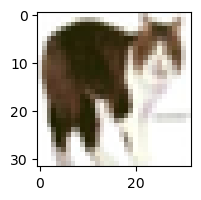

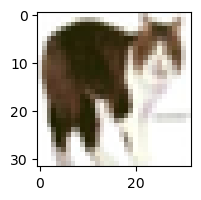

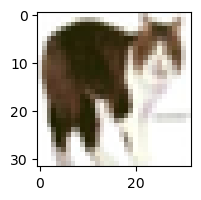

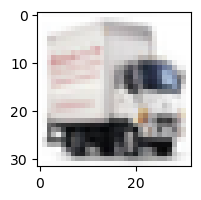

tensor(1.7080, dtype=torch.float64) tensor(1.7080, dtype=torch.float64) tensor(1.7080, dtype=torch.float64) tensor(0.9662, dtype=torch.float64) tensor(-0.0492, dtype=torch.float64)


In [41]:

# Find the indices of the maximum and minimum values
max_indices = np.unravel_index(np.argsort(cov, axis=None)[-1], cov.shape)
min_indices = np.unravel_index(np.argsort(cov, axis=None)[0], cov.shape)



# Combine the indices

indices=[max_indices[0],max_indices[1],min_indices[0],min_indices[1]]

# Iterate over the indices
for index in indices:
    # Get the current index
    
    # Get the corresponding image
    image = X_test[index].reshape((32, 32, 3))
    
    # Create a new figure with a specific size (in inches)
    plt.figure(figsize=(2, 2))

    # Plot the image
    plt.imshow(image)
    plt.show()
print(cov[max_indices[0],max_indices[0]],cov[max_indices[1],max_indices[1]],cov[min_indices[0],min_indices[0]],cov[min_indices[1],min_indices[1]],cov[min_indices[0],min_indices[1]])


These two pairs of images exhibit the lowest, respectively the highest correlated uncertainties.  In other words,  in the first pair: one image is from a class depends on whether the other image is from its class. In the second pair: one image is from a class depends whether the other image is from the opposite class.

The magnitude of variances can predict the magnitude of uncertainty. Both cases have high varainces, so here the uncertainty is low.

In [35]:

def diagonal_matrix(A):

    """This function creates a matrix that mainains the diagonals values and changes off diagonals to 0.5 from a given matrix A"""
    # Get the diagonal elements of A
    diagonal_elements = np.diag(A)

    # Create a new matrix with zeros
    diagonal_matrix = np.ones_like(A)/2

    # Set the diagonal elements of the new matrix
    np.fill_diagonal(diagonal_matrix, diagonal_elements)

    return diagonal_matrix



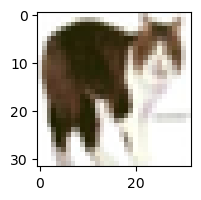

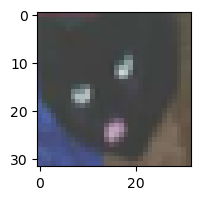

tensor(-0.5000) tensor(-0.5000)


In [38]:
""" we display the images with the lowest and  highest certainties"""
A=diagonal_matrix(cov)
# Find the indices of the maximum and minimum values
max_indices = np.unravel_index(np.argsort(A, axis=None)[-1], cov.shape)
min_indices = np.unravel_index(np.argsort(A, axis=None)[0], cov.shape)




# Combine the indices

indices=[max_indices[0],max_indices[1],min_indices[0],min_indices[1]]



image = X_test[indices[0]].reshape((32, 32, 3))

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(2, 2))

# Plot the image
plt.imshow(image)
plt.show()

image = X_test[indices[2]].reshape((32, 32, 3))
# Create a new figure with a specific size (in inches)
plt.figure(figsize=(2, 2))

# Plot the image
plt.imshow(image)
plt.show()
print(classif[indices[0]],classif[indices[2]])

In this case we plotted the imagest with the highest and lowest variances respectively. In other words, we are most certain that the first image is a cat but cannot tell whether the second image is a cat or a truck.

# Task 5:
Computational cost analysis

We implemented an algorithm that has cubic complexity with respect to the sample size given by the calculation of the inverse of the kernel. Even thought we managed to obtain a python linear implementation in the rest of the code, the run time will depend on the data size. It becomes less feasible for data of size $10^4$ especially when calculating the optimal parameters using scipy.opimize.minimize.
